In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [20]:
# size of noise vector to be used as generator input
z_dim = 10

In [21]:
def make_generator_model(z_dim=10):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(z_dim,)))
    model.add(layers.Dense(1024, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())  # Changed to ReLU

    model.add(layers.Dense(2048, use_bias=False))  # Increased units
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(28 * 28, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(2048))  # Increased units
    model.add(layers.ReLU())  # Changed to ReLU
    model.add(layers.Dropout(0.4))  # Increased dropout rate
    model.add(layers.Dense(1024))
    model.add(layers.ReLU())  # Changed to ReLU
    model.add(layers.Dropout(0.4))  # Increased dropout rate
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy()

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

batch_size = 256

@tf.function
def train_step(images):
    batch_size = tf.shape(images)[0]
    noise = tf.random.normal([batch_size, z_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

In [22]:
num_images = 20

In [23]:
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images[train_labels == 8]
train_images = (train_images - 127.5) / 127.5
train_images = tf.expand_dims(train_images, axis=-1)
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(len(train_images)).batch(batch_size)

noise = tf.random.normal([num_images, z_dim ])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
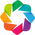

In [24]:
import holoviews as hv
import streamz
import streamz.dataframe

from holoviews import opts
from holoviews.streams import Pipe, Buffer

hv.extension('bokeh')

In [25]:
height=200
width=200

Pipes=[]
Image_Maps=[]
for i in range(0,num_images):
    Pipes.append(Pipe(data=[]))
    image_map = hv.DynamicMap(hv.Image, streams=[Pipes[i]]).opts(
                xaxis='bare',yaxis='bare',
                cmap='viridis', height=height, width=width,
                xlim=(-0.5, 0.5), ylim=(-0.5, 0.5),
                cnorm='linear' )
    Image_Maps.append(image_map)
(hv.Layout(Image_Maps).cols(3))


BokehModel(combine_events=True, render_bundle={'docs_json': {'eb465989-a6b5-4033-8f73-5314a34f64cb': {'version…

In [ ]:
epochs = 300
for epoch in range(epochs):
    
    for image_batch in train_dataset:
        train_step(image_batch)

    generated_images = generator(noise, training=False)
    
    for i in range(0,num_images):
        Pipes[i].send(generated_images[i, :, :, 0].numpy())
        

In [27]:
generated_images_X = generated_images[:num_images, :, :, 0].numpy().copy()

In [28]:
images = np.arange(0,num_images)
def draw_image(set, i):
    return hv.Image(set[i]).opts(  title='',  xaxis='bare',yaxis='bare',
                                     cmap='viridis', height=100,width=100,
                                     cnorm='linear' )
    
    

def draw_images(set, title):
    img = { i: draw_image(set, i) for i in images}
    NdLayout = hv.NdLayout(img).opts(title=title,height=2250,width=1200).cols(num_images)
    return NdLayout

draw_images(generated_images_X, 'Generated')

:NdLayout   [Default]
   :Image   [x,y]   (z)

In [29]:
from keras.models import load_model
model = load_model('fashion_mnist_model_30.keras')

pred_probs=model.predict(generated_images_X)
y_pred = np.argmax(pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [30]:
import matplotlib.pyplot as plt

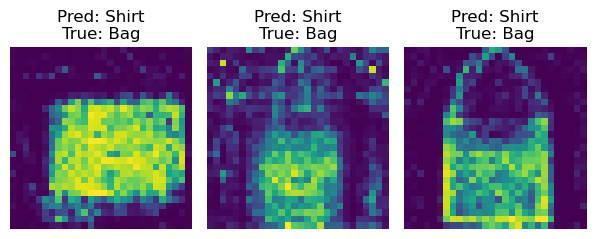

In [34]:
incorrect_indices = np.where(y_pred != 8)[0]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:20]):  # Показываем первые 20 неправильных предсказаний
    plt.subplot(4, 5, i + 1)
    plt.imshow((generated_images_X[idx] + 1) / 2)
    plt.axis('off')
    plt.title(f"Pred: {Labels[y_pred[idx]]}\nTrue: {Labels[8]}")

plt.tight_layout()
plt.show()

In [32]:
# Преобразуем из [-1,1] в [0,1] для классификатора
generated_images_for_pred = (generated_images_X + 1) / 2

# Предсказания
pred_probs = model.predict(generated_images_for_pred)
y_pred = np.argmax(pred_probs, axis=1)

# Истинные метки
y_true = np.full(shape=(num_images,), fill_value=8)

# Выводим предсказания и истинные метки
print("Predictions:", y_pred)
print("True labels:", y_true)

# Вычисляем точность
accuracy = np.mean(y_pred == y_true)
print(f"Accuracy on generated 'bag' images: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [8 6 8 8 8 6 8 6 8 8 8 8 8 8 8 8 8 8 8 8]
True labels: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
Accuracy on generated 'bag' images: 85.00%
